# Project Scoping

## 1. Project Goals

Some initial questions to answer that could be explored:

- What is the overall biodiversity across the parks?
- Are certain species more concentrated in specific parks?
- Are certain categories more endangered than others?
- Which parks have the most endangered species?
- Which species are most under threat?

## 2. Understanding the Dataset

There are two csv files: `species_info.csv` and `observations.csv`.
- `species_info.csv` columns: Animal category (eg. mammal), scientific name, common name, and conservation status.
- `observations.csv` columns: scientific name, park name, and number of observations of that animal over previous 7 days.

**Data Types**: all columns are string objects except for the number of observations which are int64.

**Size & Quality**:

- `species_info.csv`: 5,824 rows x 4 columns. Missing values: 5,633 (97%), all in the conservation status column.
- `observations.csv`: 23,296 rows x 3 columns. Missing values: 0

## 3. Key Metrics/Analysis Techniques

- Biodiversity Indexes to consider: Simpson’s Diversity Index, or Shannon Index to quantify biodiversity.
- Trend Analysis: Identify trends between parks.
- Visualization: Plan on using visualizations like bar charts, heatmaps, or maps to make the data easier to interpret.

## 4. Tools & Methods

Python Libraries: pandas, matplotlib, seaborn, for analysis and visualizations. Plotly for interactive map visualizations.

## 5. Deliverables

- Jupyter Notebook Report: Clear insights into biodiversity trends, backed by data.
- Linkedin Article: A summary of the findings and the importance of biodiversity conservation.
- Visualizations: Maps showing species distribution, charts for biodiversity indexes, etc.
- Conclusion: Summarize key findings.

---

# Boilerplate Structure for the Jupyter Notebook Report:

Project Title: Biodiversity in US National Parks
Introduction

Brief overview of the project.
Define the project goals (e.g., understanding biodiversity distribution, identifying trends, etc.).
Dataset Overview

Description of the dataset (source, size, variables).
Initial observations (any patterns or peculiarities?).
Data Cleaning & Preprocessing

Missing data handling, outliers, data transformation.
Tools and libraries used (e.g., pandas, NumPy).
Exploratory Data Analysis (EDA)

Visualizations of species diversity, park distributions, etc.
Any summary statistics or interesting patterns.
Species trends over time (if applicable).
Key Metrics & Calculations

Biodiversity indexes (e.g., Shannon Index, species richness).
Breakdown by park, species group, or region.
Insights & Findings

Highlight major trends or patterns found during analysis.
Discuss regional biodiversity differences, species at risk, etc.
Conservation Implications

Based on your findings, discuss potential conservation actions.
Any policy recommendations?
Conclusion

Summarize key takeaways.
Future work (e.g., further data collection, predictive modeling).
Appendix

Code snippets, additional graphs, or tables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [28]:
# Load the data for each table
df_obs = pd.read_csv('observations.csv')
df_species = pd.read_csv('species_info.csv')

# Display the first few rows of each table, sorted by 'scientic_name' column
df_obs = df_obs.sort_values(by='scientific_name')
df_species = df_species.sort_values(by='scientific_name')
pd.set_option('display.width', 1000) # Set a large width to prevent wrapping
print('Observations:')
print(df_obs.head(10))
print('-' * 100)
print('Species Info:')
print(df_species.head(10))

Observations:
      scientific_name                            park_name  observations
8050    Abies bifolia            Yellowstone National Park           215
4968    Abies bifolia                  Bryce National Park           109
17990   Abies bifolia  Great Smoky Mountains National Park            72
20930   Abies bifolia               Yosemite National Park           136
4647   Abies concolor  Great Smoky Mountains National Park           101
15193  Abies concolor            Yellowstone National Park           241
23166  Abies concolor               Yosemite National Park           205
8170   Abies concolor                  Bryce National Park            83
2014    Abies fraseri                  Bryce National Park           109
11141   Abies fraseri            Yellowstone National Park           218
----------------------------------------------------------------------------------------------------
Species Info:
               category       scientific_name                       

To ease data analysis and visualization, the two datasets are consolidated into one.

The common column is `scientific_name` in both datasets. It appears as though there might be four rows per species, one for each park, but this is checked as follows:

In [29]:
# Check the number of species (`scientific_name`) per park
species_per_park = df_obs.groupby('park_name')['scientific_name'].nunique()
print('Number of species per park:')
print(species_per_park)

Number of species per park:
park_name
Bryce National Park                    5541
Great Smoky Mountains National Park    5541
Yellowstone National Park              5541
Yosemite National Park                 5541
Name: scientific_name, dtype: int64


First, we drop duplicate rows:

In [30]:
# identify duplicate rows in the observations table
duplicates = df_obs.duplicated()
print('Number of duplicate rows in the observations table:')
print(duplicates.sum())

# count number of duplicate rows in the observations table
duplicates = df_obs.duplicated()

# remove duplicate rows from the observations table and save as a new dataframe
df_obs_no_duplicates = df_obs.drop_duplicates()

duplicates_check = df_obs_no_duplicates.duplicated()

print('Number of duplicate rows in the observations table after removing duplicates:')
print(duplicates_check.sum())

# count number of rows of df_obs_no_duplicates
print('Number of rows in the observations table after removing duplicates:')
print(df_obs_no_duplicates.shape[0])

Number of duplicate rows in the observations table:
15
Number of duplicate rows in the observations table after removing duplicates:
0
Number of rows in the observations table after removing duplicates:
23281


In [37]:
print(f'''If there are 5541 distinct species per park, and 4 parks, there should be 5541 * 4 = 22164 rows in the `observations.csv` file.
      
However, there are actually {df_obs_no_duplicates.shape[0]} rows i.e. an additional {df_obs_no_duplicates.shape[0] - 22164} rows.

This suggests that there are some species with more than one row for the same park. This is checked as follows:''')

If there are 5541 distinct species per park, and 4 parks, there should be 5541 * 4 = 22164 rows in the `observations.csv` file.
      
However, there are actually 23281 rows i.e. an additional 1117 rows.

This suggests that there are some species with more than one row for the same park. This is checked as follows:


In [38]:

# Group by scientific_name and count the total number of rows for each
species_row_count = df_obs_no_duplicates.groupby('scientific_name').size().reset_index(name='count')
# Filter for species with more than 4 rows
species_row_count = species_row_count[species_row_count['count'] > 4]
# Count the number of unique species with more than 4 rows
print('Number of species with more than 4 rows:')
print(species_row_count['scientific_name'].nunique())

df_obs_multiples = df_obs_no_duplicates.groupby(['scientific_name']).agg(scientific_name_count=('scientific_name', 'count')).reset_index()
df_obs_multiples = df_obs_multiples.sort_values(['scientific_name_count'])
df_obs_multiples = df_obs_multiples[df_obs_multiples['scientific_name_count'] > 4]

# for each value of scientific_name_count, list the scientific_name
for scientific_name_count in df_obs_multiples['scientific_name_count'].unique():
    print(f'Species with {scientific_name_count} rows:')
    scientific_names = df_obs_multiples[df_obs_multiples['scientific_name_count'] == scientific_name_count]['scientific_name'].tolist()
    scientific_names_sorted = sorted(scientific_names)  # Sort the list alphabetically
    print(scientific_names_sorted)

Number of species with more than 4 rows:
274
Species with 7 rows:
['Arctium minus', 'Botrychium virginianum', 'Cichorium intybus', 'Echinochloa crus-galli', 'Eleocharis palustris', 'Hesperis matronalis', 'Monotropa hypopithys', 'Plantago major', 'Poa compressa', 'Potentilla norvegica', 'Prunella vulgaris', 'Salix exigua', 'Spilogale putorius', 'Trifolium campestre']
Species with 8 rows:
['Agrostis capillaris', 'Agrostis gigantea', 'Agrostis mertensii', 'Agrostis scabra', 'Agrostis stolonifera', 'Agrostis variabilis', 'Alectoris chukar', 'Amaranthus albus', 'Amaranthus retroflexus', 'Ambrosia artemisiifolia', 'Anagallis arvensis', 'Anthemis cotula', 'Anthus rubescens', 'Apocynum androsaemifolium', 'Apocynum cannabinum', 'Arabidopsis thaliana', 'Arenaria serpyllifolia', 'Asparagus officinalis', 'Avena sativa', 'Barbarea vulgaris', 'Bidens cernua', 'Bidens tripartita', 'Botrychium simplex', 'Branta bernicla', 'Brassica rapa', 'Bromus japonicus', 'Bromus secalinus', 'Bromus tectorum', 'Bul

In [40]:
# Sum values in the 'observations' column, displayed with commas
total_obs = df_obs_no_duplicates['observations'].sum()
total_obs_str = '{:,}'.format(total_obs)
print(f'Total number of observations: {total_obs_str}')

Total number of observations: 3,312,429


In [41]:
# Sum observations values for duplicates where scientific name and park name are the same.
df_obs_clean = df_obs_no_duplicates.groupby(['scientific_name', 'park_name']).sum().reset_index()
df_obs_clean.to_csv('observations_clean.csv', index=False)

# Sum values in the 'observations' column, displayed with commas
total_obs_clean = df_obs_clean['observations'].sum()
total_obs_clean_str = '{:,}'.format(total_obs_clean)
print(f'Total number of observations after removing duplicates: {total_obs_clean_str}')

Total number of observations after removing duplicates: 3,312,429


Now that we have removed the duplicates and aggregated the observations for species within each park, we can check that there are four rows per species per park:

In [42]:
# Group by scientific_name and count the total number of rows for each
species_row_count = df_obs_clean.groupby('scientific_name').size().reset_index(name='count')
# Filter for species with more than 4 rows
species_row_count = species_row_count[species_row_count['count'] > 4]
# Count the number of unique species with more than 4 rows
print('Number of species with more than 4 rows:')
print(species_row_count['scientific_name'].nunique())

Number of species with more than 4 rows:
0


Before we merge the tables, df_species is checked for duplicates:

In [43]:
duplicates = df_species.duplicated()
print('Number of duplicate rows in the species table:')
print(duplicates.sum())

Number of duplicate rows in the species table:
0


In [44]:
# Merge the two tables on the 'scientific_name' column
df = pd.merge(df_obs_clean, df_species, on='scientific_name')

# Sort the merged table by 'scientific_name' then 'park_name'
df = df.sort_values(by=['scientific_name', 'park_name'])

# Display the first few rows of the merged table
pd.set_option('display.width', 1000) # Set a large width to prevent wrapping
print(df.head(15))

         scientific_name                            park_name  observations           category                                       common_names conservation_status
0          Abies bifolia                  Bryce National Park           109     Vascular Plant                          Rocky Mountain Alpine Fir                 NaN
1          Abies bifolia  Great Smoky Mountains National Park            72     Vascular Plant                          Rocky Mountain Alpine Fir                 NaN
2          Abies bifolia            Yellowstone National Park           215     Vascular Plant                          Rocky Mountain Alpine Fir                 NaN
3          Abies bifolia               Yosemite National Park           136     Vascular Plant                          Rocky Mountain Alpine Fir                 NaN
4         Abies concolor                  Bryce National Park            83     Vascular Plant  Balsam Fir, Colorado Fir, Concolor Fir, Silver...                 NaN
5   

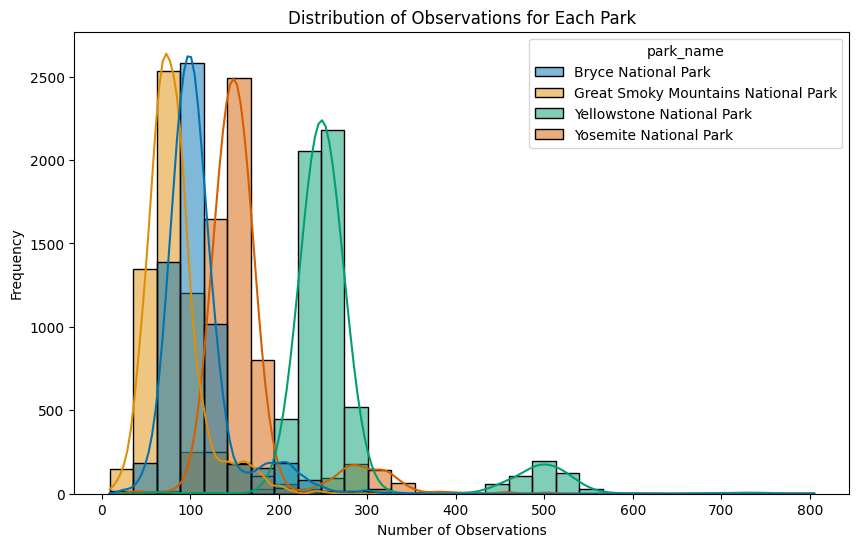

In [46]:
# Plot the distribution of observations for each park
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='observations', hue='park_name', bins=30, kde=True, palette='colorblind')
plt.title('Distribution of Observations for Each Park')
plt.xlabel('Number of Observations')
plt.ylabel('Frequency')
plt.show()


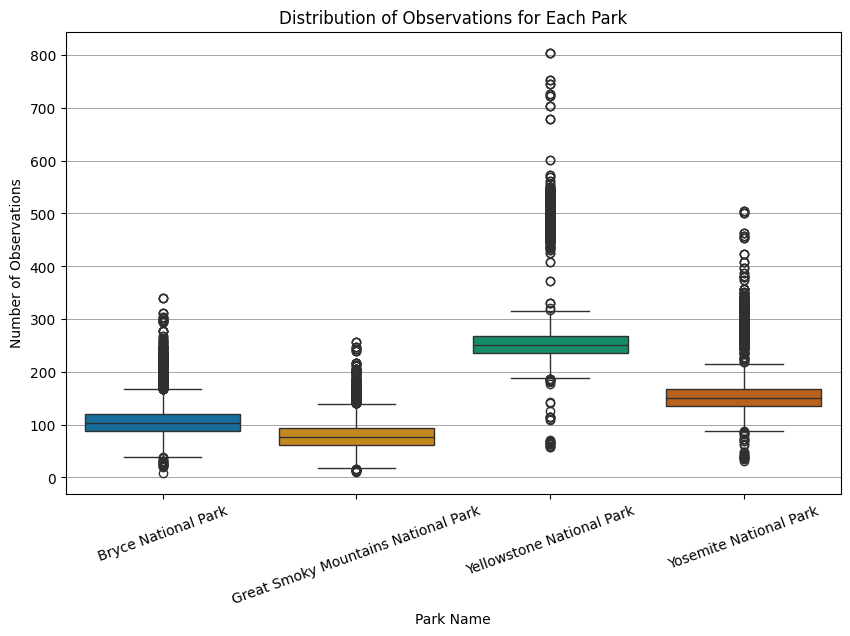

In [53]:
# Boxplots of observations for each park
plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x='park_name', y='observations', hue='park_name', palette='colorblind', legend=False)
plt.title('Distribution of Observations for Each Park')
# Angle the xlabels for better readability
plt.xticks(rotation=20)
plt.xlabel('Park Name')
plt.ylabel('Number of Observations')
# Add grey horizontal gridlines at 100 intervals
plt.grid(axis='y', which='major', color='grey', linestyle='-', linewidth=0.5)
plt.show()

NB. the default merge in pandas is an inner merge, meaning only rows 

In [16]:
# check data types
print(df.dtypes)

scientific_name        object
park_name              object
observations            int64
category               object
common_names           object
conservation_status    object
dtype: object


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25632 entries, 5468 to 17885
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      25632 non-null  object
 1   park_name            25632 non-null  object
 2   observations         25632 non-null  int64 
 3   category             25632 non-null  object
 4   common_names         25632 non-null  object
 5   conservation_status  880 non-null    object
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


In [26]:
# check for missing values
print(df.isnull().sum())

scientific_name            0
park_name                  0
observations               0
category                   0
common_names               0
conservation_status    24752
dtype: int64


In [27]:
# print unique values of conservation_status
print(df.conservation_status.unique())

[nan 'Species of Concern' 'Threatened' 'Endangered' 'In Recovery']
